# Data Set

- Human Activity Recognition Using Smartphones Data Set

In [ ]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00240/UCI%20HAR%20Dataset.zip
!unzip 'UCI HAR Dataset.zip'

--2019-10-13 16:35:00--  https://archive.ics.uci.edu/ml/machine-learning-databases/00240/UCI%20HAR%20Dataset.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 60999314 (58M) [application/x-httpd-php]
Saving to: ‘UCI HAR Dataset.zip’

UCI HAR Dataset.zip 100%[===================>]  58.17M  70.3MB/s    in 0.8s    

2019-10-13 16:35:02 (70.3 MB/s) - ‘UCI HAR Dataset.zip’ saved [60999314/60999314]

Archive:  UCI HAR Dataset.zip
   creating: UCI HAR Dataset/
  inflating: UCI HAR Dataset/.DS_Store  
   creating: __MACOSX/
   creating: __MACOSX/UCI HAR Dataset/
  inflating: __MACOSX/UCI HAR Dataset/._.DS_Store  
  inflating: UCI HAR Dataset/activity_labels.txt  
  inflating: __MACOSX/UCI HAR Dataset/._activity_labels.txt  
  inflating: UCI HAR Dataset/features.txt  
  inflating: __MACOSX/UCI HAR Dataset/._features.txt  
  infl

# Machine learning approach for Time Series Prediction

### Time series

**Definition:** A time series is a sequence of observations $s_t ∈ \mathbb{R}$, usually ordered in **time**.

`Examples of time series in every scientific and applied domain:`

- Meteorology: weather variables, like temperature, pressure, wind.
- Economy and finance: economic factors (GNP), financial indexes, exchange rate, spread.
- Marketing: activity of business, sales.
- Industry: electric load, power consumption, voltage, sensors.
- Biomedicine: physiological signals (EEG), heart-rate, patient temperature.
- Web: clicks, logs.
- Genomics: time series of gene expression during cell cycle.

### Goals in studying time series
- Prediction
- Control
- Understanding
- Description

# Human Activity Recognition Using Smartphones Data Set

You can get the dataset from **UCI Machine Learning** [Repository](https://archive.ics.uci.edu/ml/datasets/Human+Activity+Recognition+Using+Smartphones)

> The dataset was collected in a controlled, laboratory setting.  The datasets contain 561-feature vector with time and frequency domain variables.
The experiments have been carried out with a group of 30 volunteers within an age bracket of 19-48 years.

# Examining the data
Taking a look into the data directory using the 'ls' command, we get the following directory structure:

In [ ]:
!ls 'UCI HAR Dataset' -R -C -A

'UCI HAR Dataset':
activity_labels.txt  features_info.txt	README.txt  train
.DS_Store	     features.txt	test

'UCI HAR Dataset/test':
'Inertial Signals'   subject_test.txt   X_test.txt   y_test.txt

'UCI HAR Dataset/test/Inertial Signals':
body_acc_x_test.txt  body_gyro_x_test.txt  total_acc_x_test.txt
body_acc_y_test.txt  body_gyro_y_test.txt  total_acc_y_test.txt
body_acc_z_test.txt  body_gyro_z_test.txt  total_acc_z_test.txt

'UCI HAR Dataset/train':
'Inertial Signals'   subject_train.txt	 X_train.txt   y_train.txt

'UCI HAR Dataset/train/Inertial Signals':
body_acc_x_train.txt  body_gyro_x_train.txt  total_acc_x_train.txt
body_acc_y_train.txt  body_gyro_y_train.txt  total_acc_y_train.txt
body_acc_z_train.txt  body_gyro_z_train.txt  total_acc_z_train.txt


# Reading the data

In [ ]:
# Importing Pandas library to read the csv files
import pandas as pd

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 600)
pd.set_option('display.width', 1000)


# Getting attributes(features name from features.txt file)
feature_labels = pd.read_csv('UCI HAR Dataset/features.txt', delim_whitespace=True, header=None)
feature_labels = feature_labels[1] # Drop the first column which is just an index

#Reading training datasets (X_train dataframe consist of all the attributes, y_train consist of results)
X_train = pd.read_csv('UCI HAR Dataset/train/X_train.txt', delim_whitespace=True, header=None, names=feature_labels)
y_train = pd.read_csv('UCI HAR Dataset/train/y_train.txt', delim_whitespace=True, header=None)

/usr/local/lib/python3.6/dist-packages/pandas/io/parsers.py:702: UserWarning: Duplicate names specified. This will raise an error in the future.
  return _read(filepath_or_buffer, kwds)


In [ ]:
# Describing X_train dataframe
X_train.describe()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,tBodyAcc-max()-Y,tBodyAcc-max()-Z,tBodyAcc-min()-X,tBodyAcc-min()-Y,tBodyAcc-min()-Z,tBodyAcc-sma(),tBodyAcc-energy()-X,tBodyAcc-energy()-Y,tBodyAcc-energy()-Z,tBodyAcc-iqr()-X,tBodyAcc-iqr()-Y,tBodyAcc-iqr()-Z,tBodyAcc-entropy()-X,tBodyAcc-entropy()-Y,tBodyAcc-entropy()-Z,"tBodyAcc-arCoeff()-X,1","tBodyAcc-arCoeff()-X,2","tBodyAcc-arCoeff()-X,3","tBodyAcc-arCoeff()-X,4","tBodyAcc-arCoeff()-Y,1","tBodyAcc-arCoeff()-Y,2","tBodyAcc-arCoeff()-Y,3","tBodyAcc-arCoeff()-Y,4","tBodyAcc-arCoeff()-Z,1","tBodyAcc-arCoeff()-Z,2","tBodyAcc-arCoeff()-Z,3","tBodyAcc-arCoeff()-Z,4","tBodyAcc-correlation()-X,Y","tBodyAcc-correlation()-X,Z","tBodyAcc-correlation()-Y,Z",tGravityAcc-mean()-X,tGravityAcc-mean()-Y,tGravityAcc-mean()-Z,tGravityAcc-std()-X,tGravityAcc-std()-Y,tGravityAcc-std()-Z,tGravityAcc-mad()-X,tGravityAcc-mad()-Y,tGravityAcc-mad()-Z,tGravityAcc-max()-X,tGravityAcc-max()-Y,tGravityAcc-max()-Z,tGravityAcc-min()-X,tGravityAcc-min()-Y,tGravityAcc-min()-Z,tGravityAcc-sma(),tGravityAcc-energy()-X,tGravityAcc-energy()-Y,tGravityAcc-energy()-Z,tGravityAcc-iqr()-X,tGravityAcc-iqr()-Y,tGravityAcc-iqr()-Z,tGravityAcc-entropy()-X,tGravityAcc-entropy()-Y,tGravityAcc-entropy()-Z,"tGravityAcc-arCoeff()-X,1","tGravityAcc-arCoeff()-X,2","tGravityAcc-arCoeff()-X,3","tGravityAcc-arCoeff()-X,4","tGravityAcc-arCoeff()-Y,1","tGravityAcc-arCoeff()-Y,2","tGravityAcc-arCoeff()-Y,3","tGravityAcc-arCoeff()-Y,4","tGravityAcc-arCoeff()-Z,1","tGravityAcc-arCoeff()-Z,2","tGravityAcc-arCoeff()-Z,3","tGravityAcc-arCoeff()-Z,4","tGravityAcc-correlation()-X,Y","tGravityAcc-correlation()-X,Z","tGravityAcc-correlation()-Y,Z",tBodyAccJerk-mean()-X,tBodyAccJerk-mean()-Y,tBodyAccJerk-mean()-Z,tBodyAccJerk-std()-X,tBodyAccJerk-std()-Y,tBodyAccJerk-std()-Z,tBodyAccJerk-mad()-X,tBodyAccJerk-mad()-Y,tBodyAccJerk-mad()-Z,tBodyAccJerk-max()-X,tBodyAccJerk-max()-Y,tBodyAccJerk-max()-Z,tBodyAccJerk-min()-X,tBodyAccJerk-min()-Y,tBodyAccJerk-min()-Z,tBodyAccJerk-sma(),tBodyAccJerk-energy()-X,tBodyAccJerk-energy()-Y,tBodyAccJerk-energy()-Z,tBodyAccJerk-iqr()-X,tBodyAccJerk-iqr()-Y,tBodyAccJerk-iqr()-Z,tBodyAccJerk-entropy()-X,tBodyAccJerk-entropy()-Y,tBodyAccJerk-entropy()-Z,"tBodyAccJerk-arCoeff()-X,1","tBodyAccJerk-arCoeff()-X,2","tBodyAccJerk-arCoeff()-X,3","tBodyAccJerk-arCoeff()-X,4","tBodyAccJerk-arCoeff()-Y,1","tBodyAccJerk-arCoeff()-Y,2","tBodyAccJerk-arCoeff()-Y,3","tBodyAccJerk-arCoeff()-Y,4","tBodyAccJerk-arCoeff()-Z,1","tBodyAccJerk-arCoeff()-Z,2","tBodyAccJerk-arCoeff()-Z,3","tBodyAccJerk-arCoeff()-Z,4","tBodyAccJerk-correlation()-X,Y","tBodyAccJerk-correlation()-X,Z","tBodyAccJerk-correlation()-Y,Z",tBodyGyro-mean()-X,tBodyGyro-mean()-Y,tBodyGyro-mean()-Z,tBodyGyro-std()-X,tBodyGyro-std()-Y,tBodyGyro-std()-Z,tBodyGyro-mad()-X,tBodyGyro-mad()-Y,tBodyGyro-mad()-Z,tBodyGyro-max()-X,tBodyGyro-max()-Y,tBodyGyro-max()-Z,tBodyGyro-min()-X,tBodyGyro-min()-Y,tBodyGyro-min()-Z,tBodyGyro-sma(),tBodyGyro-energy()-X,tBodyGyro-energy()-Y,tBodyGyro-energy()-Z,tBodyGyro-iqr()-X,tBodyGyro-iqr()-Y,tBodyGyro-iqr()-Z,tBodyGyro-entropy()-X,tBodyGyro-entropy()-Y,tBodyGyro-entropy()-Z,"tBodyGyro-arCoeff()-X,1","tBodyGyro-arCoeff()-X,2","tBodyGyro-arCoeff()-X,3","tBodyGyro-arCoeff()-X,4","tBodyGyro-arCoeff()-Y,1","tBodyGyro-arCoeff()-Y,2","tBodyGyro-arCoeff()-Y,3","tBodyGyro-arCoeff()-Y,4","tBodyGyro-arCoeff()-Z,1","tBodyGyro-arCoeff()-Z,2","tBodyGyro-arCoeff()-Z,3","tBodyGyro-arCoeff()-Z,4","tBodyGyro-correlation()-X,Y","tBodyGyro-correlation()-X,Z","tBodyGyro-correlation()-Y,Z",tBodyGyroJerk-mean()-X,tBodyGyroJerk-mean()-Y,tBodyGyroJerk-mean()-Z,tBodyGyroJerk-std()-X,tBodyGyroJerk-std()-Y,tBodyGyroJerk-std()-Z,tBodyGyroJerk-mad()-X,tBodyGyroJerk-mad()-Y,tBodyGyroJerk-mad()-Z,tBodyGyroJerk-max()-X,tBodyGyroJerk-max()-Y,tBodyGyroJerk-max()-Z,tBodyGyroJerk-min()-X,tBodyGyroJerk-min()-Y,tBodyGyroJerk-min()-Z,tBodyGyroJ

In [ ]:
# Describing y_train dataframe
y_train.describe()

,0
count,7352.000000
mean,3.643362
std,1.744802
min,1.000000
25%,2.000000
50%,4.000000
75%,5.000000
max,6.000000


## Visualizing Heat Map
- Trying too see the heat map of input features

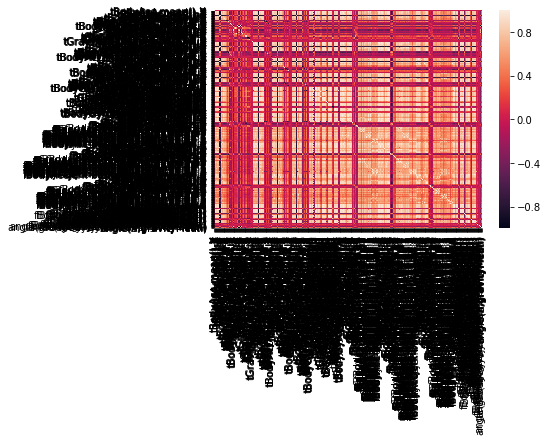

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
auto_data = X_train
corr = auto_data.corr()
sns.heatmap(corr, 
 xticklabels=corr.columns,
 yticklabels=corr.columns)

plt.show()

In [ ]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

#from statsmodels.graphics.gofplots import qqplot
#from sklearn.preprocessing import PolynomialFeatures
#from sklearn.tree import DecisionTreeRegressor
# Make the graphs a bit prettier, and bigger


# What does the data look like?

Let's see by doing some preprocessing and plotting the dataset.

- The barcharts below show the values of each feature are normalized to $[-1, 1]$ as well as each feature being **normally distributed**.

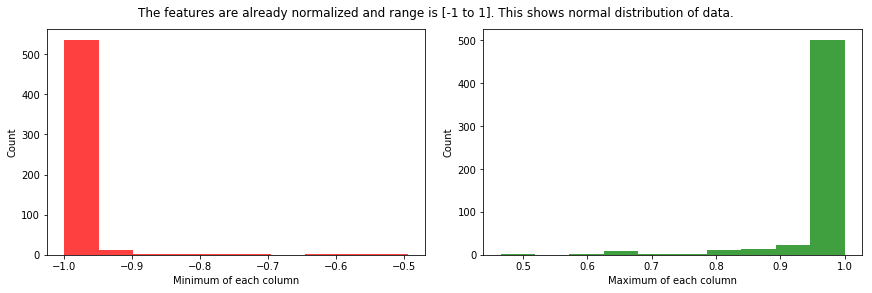

In [ ]:
#Plot the inline plots
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, constrained_layout=True,figsize=(12,4))

axs[0].hist(X_train.min(),bins=10, facecolor='r', alpha=0.75)
#axs[0].set_title('')
axs[0].set_xlabel('Minimum of each column')
axs[0].set_ylabel('Count')

fig.suptitle('The features are already normalized and range is [-1 to 1]. This shows normal distribution of data.', fontsize=12)

axs[1].hist(X_train.max(),bins=10,facecolor='g', alpha=0.75)
axs[1].set_xlabel('Maximum of each column')
#axs[1].set_title('')
axs[1].set_ylabel('Count')

plt.show()


- Now plotting randomly selected features to visualize the attributes.

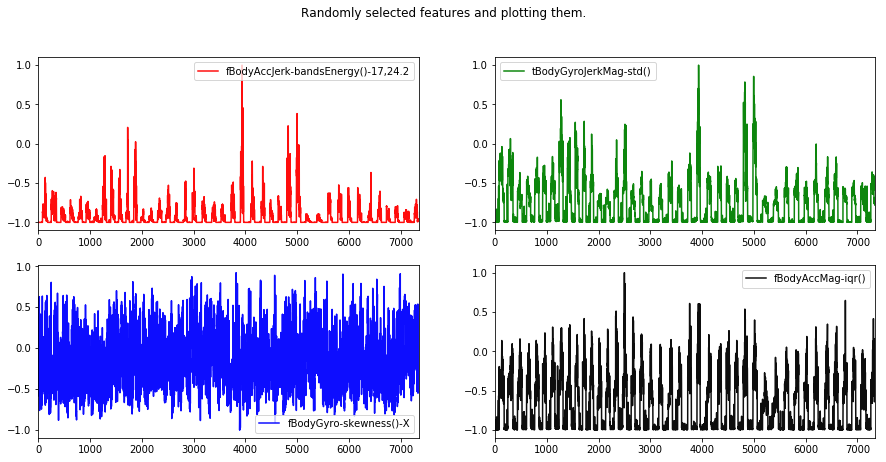

In [ ]:
# Getting all the features name in the list
colNames=[i for i in X_train]

# Importing random to create random integers values in a defined range.
from random import randint

feature_size = X_train.shape[1] # There are 561 features
rand_list = list(randint(0,feature_size) for i in range(4)) # make a list of features to randomly sample.


fig, axes = plt.subplots(nrows=2, ncols=2)

fig.suptitle('Randomly selected features and plotting them.', fontsize=12)

X_train.iloc[:,rand_list[0]].plot(ax=axes[0,0], figsize=(15,7),legend=colNames[rand_list[0]], color='r', alpha=0.95)
X_train.iloc[:,rand_list[1]].plot(ax=axes[0,1], figsize=(15,7),legend=colNames[rand_list[1]], color='g', alpha=0.95)
X_train.iloc[:,rand_list[2]].plot(ax=axes[1,0], figsize=(15,7),legend=colNames[rand_list[2]], color='b', alpha=0.95)
X_train.iloc[:,rand_list[3]].plot(ax=axes[1,1], figsize=(15,7),legend=colNames[rand_list[3]], color='k', alpha=0.95)

plt.show()

# Analysing output variable(Y)

- There are total 6 features as follows:
    - **WALKING label** is encoded as label **1**
    - **WALKING_UPSTAIRS** label is encoded as label **2**
    - **WALKING_DOWNSTAIRS** label is encoded as label **3**
    - **SITTING label** is encoded as label **4**
    - **STANDING label** is encoded as label **5**
    - **LAYING label** is encoded as label **6**


- Now we can have two choices to classify the entire dataset:
    - Club together attributes where there is some amount of activity like label 1,2,3 as **'1'** and label 4,5,6 with no activity as **'0'**.
    - Another way is to simply classify on the default parameters.
- We will try to see the accuracy on both of this Y parameters. 


In [ ]:
'''
creating two empty list which will contain indexes of the following
conditions and will be passed in main dataframe to filter out the rows according activity and noActivity.
'''
noActivityIndex=[]
activityIndex=[]

y_train2=pd.read_csv('UCI HAR Dataset/train/y_train.txt', delim_whitespace=True, header=None)

for i in range(len(X_train)):
    
    check=y_train[0].iloc[i]
    if (check==1) or (check==2) or (check==3):
        activityIndex.append(i)
        y_train2[0].iloc[i]=1
        
    else:
        noActivityIndex.append(i)
        y_train2[0].iloc[i]=0

        
# Creating Dataframes for activity and no activity
noActivityDataframe=X_train.iloc[noActivityIndex,:]
activityDataframe=X_train.iloc[activityIndex,:]

# resetting index from 0 and removing index column that was created.
activityDataframe.reset_index(inplace=True)
activityDataframe=activityDataframe.iloc[:,1:]

noActivityDataframe.reset_index(inplace=True)
noActivityDataframe=noActivityDataframe.iloc[:,1:]


### Visualizing both the dataframes

In [ ]:
activityDataframe.head(2)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,tBodyAcc-max()-Y,tBodyAcc-max()-Z,tBodyAcc-min()-X,tBodyAcc-min()-Y,tBodyAcc-min()-Z,tBodyAcc-sma(),tBodyAcc-energy()-X,tBodyAcc-energy()-Y,tBodyAcc-energy()-Z,tBodyAcc-iqr()-X,tBodyAcc-iqr()-Y,tBodyAcc-iqr()-Z,tBodyAcc-entropy()-X,tBodyAcc-entropy()-Y,tBodyAcc-entropy()-Z,"tBodyAcc-arCoeff()-X,1","tBodyAcc-arCoeff()-X,2","tBodyAcc-arCoeff()-X,3","tBodyAcc-arCoeff()-X,4","tBodyAcc-arCoeff()-Y,1","tBodyAcc-arCoeff()-Y,2","tBodyAcc-arCoeff()-Y,3","tBodyAcc-arCoeff()-Y,4","tBodyAcc-arCoeff()-Z,1","tBodyAcc-arCoeff()-Z,2","tBodyAcc-arCoeff()-Z,3","tBodyAcc-arCoeff()-Z,4","tBodyAcc-correlation()-X,Y","tBodyAcc-correlation()-X,Z","tBodyAcc-correlation()-Y,Z",tGravityAcc-mean()-X,tGravityAcc-mean()-Y,tGravityAcc-mean()-Z,tGravityAcc-std()-X,tGravityAcc-std()-Y,tGravityAcc-std()-Z,tGravityAcc-mad()-X,tGravityAcc-mad()-Y,tGravityAcc-mad()-Z,tGravityAcc-max()-X,tGravityAcc-max()-Y,tGravityAcc-max()-Z,tGravityAcc-min()-X,tGravityAcc-min()-Y,tGravityAcc-min()-Z,tGravityAcc-sma(),tGravityAcc-energy()-X,tGravityAcc-energy()-Y,tGravityAcc-energy()-Z,tGravityAcc-iqr()-X,tGravityAcc-iqr()-Y,tGravityAcc-iqr()-Z,tGravityAcc-entropy()-X,tGravityAcc-entropy()-Y,tGravityAcc-entropy()-Z,"tGravityAcc-arCoeff()-X,1","tGravityAcc-arCoeff()-X,2","tGravityAcc-arCoeff()-X,3","tGravityAcc-arCoeff()-X,4","tGravityAcc-arCoeff()-Y,1","tGravityAcc-arCoeff()-Y,2","tGravityAcc-arCoeff()-Y,3","tGravityAcc-arCoeff()-Y,4","tGravityAcc-arCoeff()-Z,1","tGravityAcc-arCoeff()-Z,2","tGravityAcc-arCoeff()-Z,3","tGravityAcc-arCoeff()-Z,4","tGravityAcc-correlation()-X,Y","tGravityAcc-correlation()-X,Z","tGravityAcc-correlation()-Y,Z",tBodyAccJerk-mean()-X,tBodyAccJerk-mean()-Y,tBodyAccJerk-mean()-Z,tBodyAccJerk-std()-X,tBodyAccJerk-std()-Y,tBodyAccJerk-std()-Z,tBodyAccJerk-mad()-X,tBodyAccJerk-mad()-Y,tBodyAccJerk-mad()-Z,tBodyAccJerk-max()-X,tBodyAccJerk-max()-Y,tBodyAccJerk-max()-Z,tBodyAccJerk-min()-X,tBodyAccJerk-min()-Y,tBodyAccJerk-min()-Z,tBodyAccJerk-sma(),tBodyAccJerk-energy()-X,tBodyAccJerk-energy()-Y,tBodyAccJerk-energy()-Z,tBodyAccJerk-iqr()-X,tBodyAccJerk-iqr()-Y,tBodyAccJerk-iqr()-Z,tBodyAccJerk-entropy()-X,tBodyAccJerk-entropy()-Y,tBodyAccJerk-entropy()-Z,"tBodyAccJerk-arCoeff()-X,1","tBodyAccJerk-arCoeff()-X,2","tBodyAccJerk-arCoeff()-X,3","tBodyAccJerk-arCoeff()-X,4","tBodyAccJerk-arCoeff()-Y,1","tBodyAccJerk-arCoeff()-Y,2","tBodyAccJerk-arCoeff()-Y,3","tBodyAccJerk-arCoeff()-Y,4","tBodyAccJerk-arCoeff()-Z,1","tBodyAccJerk-arCoeff()-Z,2","tBodyAccJerk-arCoeff()-Z,3","tBodyAccJerk-arCoeff()-Z,4","tBodyAccJerk-correlation()-X,Y","tBodyAccJerk-correlation()-X,Z","tBodyAccJerk-correlation()-Y,Z",tBodyGyro-mean()-X,tBodyGyro-mean()-Y,tBodyGyro-mean()-Z,tBodyGyro-std()-X,tBodyGyro-std()-Y,tBodyGyro-std()-Z,tBodyGyro-mad()-X,tBodyGyro-mad()-Y,tBodyGyro-mad()-Z,tBodyGyro-max()-X,tBodyGyro-max()-Y,tBodyGyro-max()-Z,tBodyGyro-min()-X,tBodyGyro-min()-Y,tBodyGyro-min()-Z,tBodyGyro-sma(),tBodyGyro-energy()-X,tBodyGyro-energy()-Y,tBodyGyro-energy()-Z,tBodyGyro-iqr()-X,tBodyGyro-iqr()-Y,tBodyGyro-iqr()-Z,tBodyGyro-entropy()-X,tBodyGyro-entropy()-Y,tBodyGyro-entropy()-Z,"tBodyGyro-arCoeff()-X,1","tBodyGyro-arCoeff()-X,2","tBodyGyro-arCoeff()-X,3","tBodyGyro-arCoeff()-X,4","tBodyGyro-arCoeff()-Y,1","tBodyGyro-arCoeff()-Y,2","tBodyGyro-arCoeff()-Y,3","tBodyGyro-arCoeff()-Y,4","tBodyGyro-arCoeff()-Z,1","tBodyGyro-arCoeff()-Z,2","tBodyGyro-arCoeff()-Z,3","tBodyGyro-arCoeff()-Z,4","tBodyGyro-correlation()-X,Y","tBodyGyro-correlation()-X,Z","tBodyGyro-correlation()-Y,Z",tBodyGyroJerk-mean()-X,tBodyGyroJerk-mean()-Y,tBodyGyroJerk-mean()-Z,tBodyGyroJerk-std()-X,tBodyGyroJerk-std()-Y,tBodyGyroJerk-std()-Z,tBodyGyroJerk-mad()-X,tBodyGyroJerk-mad()-Y,tBodyGyroJerk-mad()-Z,tBodyGyroJerk-max()-X,tBodyGyroJerk-max()-Y,tBodyGyroJerk-max()-Z,tBodyGyroJerk-min()-X,tBodyGyroJerk-min()-Y,tBodyGyroJerk-min()-Z,tBodyGyroJ

In [ ]:
noActivityDataframe.head(2)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,tBodyAcc-max()-Y,tBodyAcc-max()-Z,tBodyAcc-min()-X,tBodyAcc-min()-Y,tBodyAcc-min()-Z,tBodyAcc-sma(),tBodyAcc-energy()-X,tBodyAcc-energy()-Y,tBodyAcc-energy()-Z,tBodyAcc-iqr()-X,tBodyAcc-iqr()-Y,tBodyAcc-iqr()-Z,tBodyAcc-entropy()-X,tBodyAcc-entropy()-Y,tBodyAcc-entropy()-Z,"tBodyAcc-arCoeff()-X,1","tBodyAcc-arCoeff()-X,2","tBodyAcc-arCoeff()-X,3","tBodyAcc-arCoeff()-X,4","tBodyAcc-arCoeff()-Y,1","tBodyAcc-arCoeff()-Y,2","tBodyAcc-arCoeff()-Y,3","tBodyAcc-arCoeff()-Y,4","tBodyAcc-arCoeff()-Z,1","tBodyAcc-arCoeff()-Z,2","tBodyAcc-arCoeff()-Z,3","tBodyAcc-arCoeff()-Z,4","tBodyAcc-correlation()-X,Y","tBodyAcc-correlation()-X,Z","tBodyAcc-correlation()-Y,Z",tGravityAcc-mean()-X,tGravityAcc-mean()-Y,tGravityAcc-mean()-Z,tGravityAcc-std()-X,tGravityAcc-std()-Y,tGravityAcc-std()-Z,tGravityAcc-mad()-X,tGravityAcc-mad()-Y,tGravityAcc-mad()-Z,tGravityAcc-max()-X,tGravityAcc-max()-Y,tGravityAcc-max()-Z,tGravityAcc-min()-X,tGravityAcc-min()-Y,tGravityAcc-min()-Z,tGravityAcc-sma(),tGravityAcc-energy()-X,tGravityAcc-energy()-Y,tGravityAcc-energy()-Z,tGravityAcc-iqr()-X,tGravityAcc-iqr()-Y,tGravityAcc-iqr()-Z,tGravityAcc-entropy()-X,tGravityAcc-entropy()-Y,tGravityAcc-entropy()-Z,"tGravityAcc-arCoeff()-X,1","tGravityAcc-arCoeff()-X,2","tGravityAcc-arCoeff()-X,3","tGravityAcc-arCoeff()-X,4","tGravityAcc-arCoeff()-Y,1","tGravityAcc-arCoeff()-Y,2","tGravityAcc-arCoeff()-Y,3","tGravityAcc-arCoeff()-Y,4","tGravityAcc-arCoeff()-Z,1","tGravityAcc-arCoeff()-Z,2","tGravityAcc-arCoeff()-Z,3","tGravityAcc-arCoeff()-Z,4","tGravityAcc-correlation()-X,Y","tGravityAcc-correlation()-X,Z","tGravityAcc-correlation()-Y,Z",tBodyAccJerk-mean()-X,tBodyAccJerk-mean()-Y,tBodyAccJerk-mean()-Z,tBodyAccJerk-std()-X,tBodyAccJerk-std()-Y,tBodyAccJerk-std()-Z,tBodyAccJerk-mad()-X,tBodyAccJerk-mad()-Y,tBodyAccJerk-mad()-Z,tBodyAccJerk-max()-X,tBodyAccJerk-max()-Y,tBodyAccJerk-max()-Z,tBodyAccJerk-min()-X,tBodyAccJerk-min()-Y,tBodyAccJerk-min()-Z,tBodyAccJerk-sma(),tBodyAccJerk-energy()-X,tBodyAccJerk-energy()-Y,tBodyAccJerk-energy()-Z,tBodyAccJerk-iqr()-X,tBodyAccJerk-iqr()-Y,tBodyAccJerk-iqr()-Z,tBodyAccJerk-entropy()-X,tBodyAccJerk-entropy()-Y,tBodyAccJerk-entropy()-Z,"tBodyAccJerk-arCoeff()-X,1","tBodyAccJerk-arCoeff()-X,2","tBodyAccJerk-arCoeff()-X,3","tBodyAccJerk-arCoeff()-X,4","tBodyAccJerk-arCoeff()-Y,1","tBodyAccJerk-arCoeff()-Y,2","tBodyAccJerk-arCoeff()-Y,3","tBodyAccJerk-arCoeff()-Y,4","tBodyAccJerk-arCoeff()-Z,1","tBodyAccJerk-arCoeff()-Z,2","tBodyAccJerk-arCoeff()-Z,3","tBodyAccJerk-arCoeff()-Z,4","tBodyAccJerk-correlation()-X,Y","tBodyAccJerk-correlation()-X,Z","tBodyAccJerk-correlation()-Y,Z",tBodyGyro-mean()-X,tBodyGyro-mean()-Y,tBodyGyro-mean()-Z,tBodyGyro-std()-X,tBodyGyro-std()-Y,tBodyGyro-std()-Z,tBodyGyro-mad()-X,tBodyGyro-mad()-Y,tBodyGyro-mad()-Z,tBodyGyro-max()-X,tBodyGyro-max()-Y,tBodyGyro-max()-Z,tBodyGyro-min()-X,tBodyGyro-min()-Y,tBodyGyro-min()-Z,tBodyGyro-sma(),tBodyGyro-energy()-X,tBodyGyro-energy()-Y,tBodyGyro-energy()-Z,tBodyGyro-iqr()-X,tBodyGyro-iqr()-Y,tBodyGyro-iqr()-Z,tBodyGyro-entropy()-X,tBodyGyro-entropy()-Y,tBodyGyro-entropy()-Z,"tBodyGyro-arCoeff()-X,1","tBodyGyro-arCoeff()-X,2","tBodyGyro-arCoeff()-X,3","tBodyGyro-arCoeff()-X,4","tBodyGyro-arCoeff()-Y,1","tBodyGyro-arCoeff()-Y,2","tBodyGyro-arCoeff()-Y,3","tBodyGyro-arCoeff()-Y,4","tBodyGyro-arCoeff()-Z,1","tBodyGyro-arCoeff()-Z,2","tBodyGyro-arCoeff()-Z,3","tBodyGyro-arCoeff()-Z,4","tBodyGyro-correlation()-X,Y","tBodyGyro-correlation()-X,Z","tBodyGyro-correlation()-Y,Z",tBodyGyroJerk-mean()-X,tBodyGyroJerk-mean()-Y,tBodyGyroJerk-mean()-Z,tBodyGyroJerk-std()-X,tBodyGyroJerk-std()-Y,tBodyGyroJerk-std()-Z,tBodyGyroJerk-mad()-X,tBodyGyroJerk-mad()-Y,tBodyGyroJerk-mad()-Z,tBodyGyroJerk-max()-X,tBodyGyroJerk-max()-Y,tBodyGyroJerk-max()-Z,tBodyGyroJerk-min()-X,tBodyGyroJerk-min()-Y,tBodyGyroJerk-min()-Z,tBodyGyroJ

### Plotting 3D plot for tbodyAcc-mean()-X,Y,Z for activity and no activity dataframe

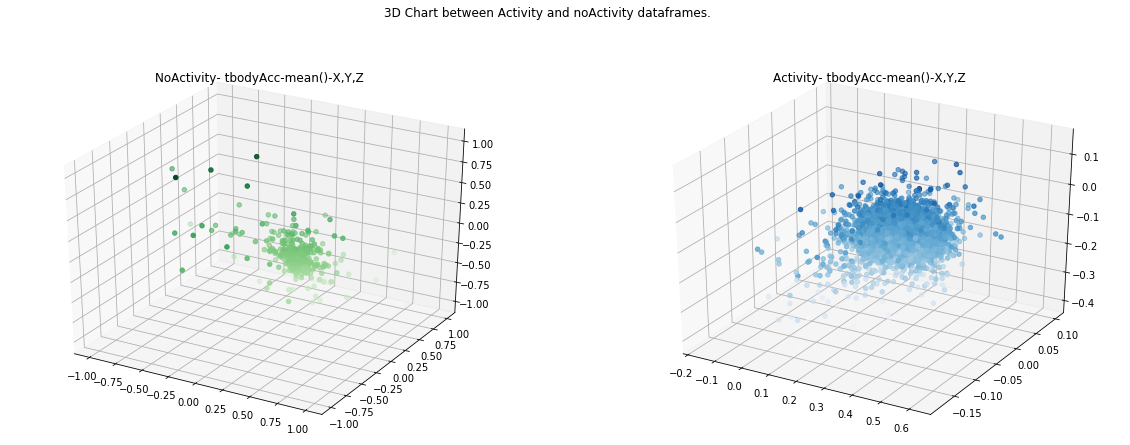

In [ ]:
from mpl_toolkits import mplot3d

fig1=plt.figure(figsize=(20,7))
ax11=fig1.add_subplot(121,projection='3d')
ax12=fig1.add_subplot(122,projection='3d')
ax11.set_title('NoActivity- tbodyAcc-mean()-X,Y,Z ')
ax12.set_title('Activity- tbodyAcc-mean()-X,Y,Z')
fig1.suptitle('3D Chart between Activity and noActivity dataframes.', fontsize=12)
# ax11.set_xlabel('x')
# ax11.set_ylabel('y')
# ax11.set_zlabel('z');

# Data for three-dimensional scattered points - ax1
xdata = noActivityDataframe.iloc[:,0]
ydata = noActivityDataframe.iloc[:,1]
zdata = noActivityDataframe.iloc[:,2]
ax11.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens');

# Data for three-dimensional scattered points - ax2
xdata = activityDataframe.iloc[:,0]
ydata = activityDataframe.iloc[:,1]
zdata = activityDataframe.iloc[:,2]

ax12.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Blues');


- It shows that range of features of activity dataframe is more converged and is roughly between -0.4 to 0.6 for all x,y and z values.

- But their is some noise in noActivity and its range is from -1 to 1. Clearly it shows that activity dataframe follows much more consistency. It will help us to group our data and classify between noActivity and activity datasets.

## Smoothing the data

- Now we are taking the rolling mean of 3 values and replacing each value with mean.
- So it will start with 3rd row as initially, the window size is not 3. It will take mean of first 3 values and replace it with 3rd row. This process will continue and it will smooth our data.

In [ ]:
# For No Activity
width = 3
window = noActivityDataframe.rolling(window=width)
noActivityDataframe = window.mean()
noActivityDataframe=noActivityDataframe.iloc[2:,:]

#For Activity
window1 = activityDataframe.rolling(window=width)
activityDataframe = window1.mean()
activityDataframe=activityDataframe.iloc[2:,:]

## Comparing No-Activity dataframe with Activity dataframe

- Some key features were taken to compare like
    - tBodyAcc-mean()-X,Y,Z
    - tGravityAcc-mean()-X,Y,Z
    - tBodyAccJerk-mean()-X,Y,Z
    
- Some of them have high fluctuation in either of them in a particular range which helps to distinguish the activity vs no activity.


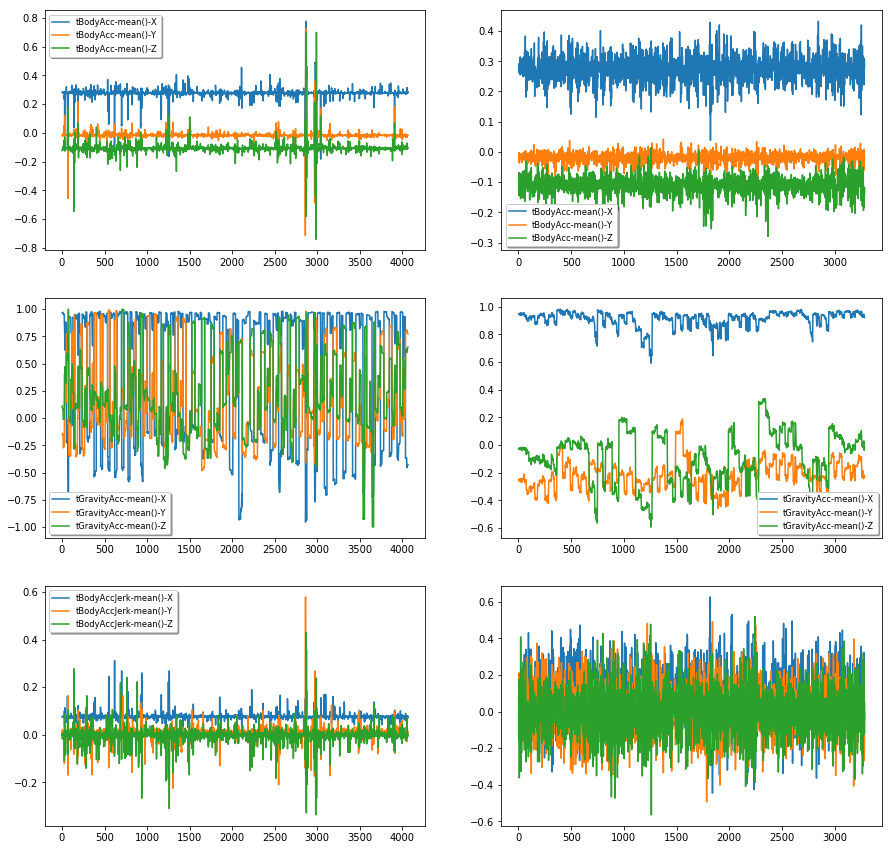

In [ ]:
# Plotting the line plot between two dataframe activity and NoActivity.

fig, ax=plt.subplots(nrows=3, ncols=2,figsize=(15,15))
ax[0,0].plot(noActivityDataframe.iloc[:,0],label='tBodyAcc-mean()-X')
ax[0,0].plot(noActivityDataframe.iloc[:,1],label='tBodyAcc-mean()-Y')
ax[0,0].plot(noActivityDataframe.iloc[:,2],label='tBodyAcc-mean()-Z')
ax[0,0].legend(shadow=True, fontsize='small')

ax[0,1].plot(activityDataframe.iloc[:,0],label='tBodyAcc-mean()-X')
ax[0,1].plot(activityDataframe.iloc[:,1],label='tBodyAcc-mean()-Y')
ax[0,1].plot(activityDataframe.iloc[:,2],label='tBodyAcc-mean()-Z')

ax[0,1].legend(shadow=True, fontsize='small')


ax[1,0].plot(noActivityDataframe.iloc[:,40],label='tGravityAcc-mean()-X')
ax[1,0].plot(noActivityDataframe.iloc[:,41],label='tGravityAcc-mean()-Y')
ax[1,0].plot(noActivityDataframe.iloc[:,42],label='tGravityAcc-mean()-Z')
ax[1,0].legend(shadow=True, fontsize='small')

ax[1,1].plot(activityDataframe.iloc[:,40],label='tGravityAcc-mean()-X')
ax[1,1].plot(activityDataframe.iloc[:,41],label='tGravityAcc-mean()-Y')
ax[1,1].plot(activityDataframe.iloc[:,42],label='tGravityAcc-mean()-Z')

ax[1,1].legend(shadow=True, fontsize='small')



ax[2,0].plot(noActivityDataframe.iloc[:,80],label='tBodyAccJerk-mean()-X')
ax[2,0].plot(noActivityDataframe.iloc[:,81],label='tBodyAccJerk-mean()-Y')
ax[2,0].plot(noActivityDataframe.iloc[:,82],label='tBodyAccJerk-mean()-Z')
ax[2,0].legend(shadow=True, fontsize='small')

ax[2,1].plot(activityDataframe.iloc[:,80],label='tBodyAccJerk-mean()-X')
ax[2,1].plot(activityDataframe.iloc[:,81],label='tBodyAccJerk-mean()-Y')
ax[2,1].plot(activityDataframe.iloc[:,82],label='tBodyAccJerk-mean()-Z')

ax[1,1].legend(shadow=True, fontsize='small')

plt.show()



## Is the data well-behaved?
### Is each activity represented about equally in the dataset?
- To check whether each activity is represented about equally, We'll look at the y_train class distribution.

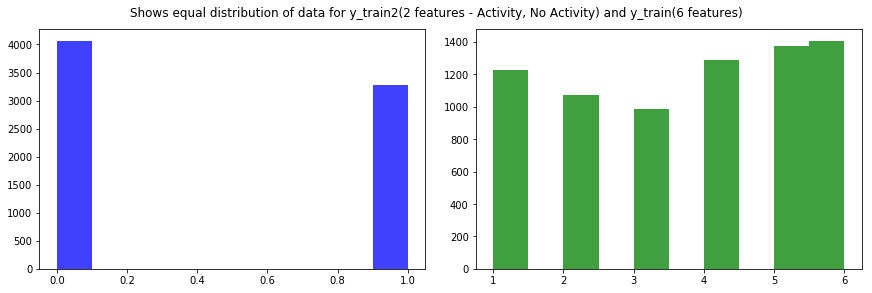

In [ ]:
import numpy as np

fig, ax= plt.subplots(1, 2, constrained_layout=True,figsize=(12,4))

ax[0].hist(np.array(y_train2),bins=10,facecolor='b', alpha=0.75)
axs[0].set_xlabel('Labels')
axs[0].set_ylabel('Count')
axs[0].set_title('y_train2')
fig.suptitle('Shows equal distribution of data for y_train2(2 features - Activity, No Activity) and y_train(6 features)', fontsize=12)

ax[1].hist(np.array(y_train),bins=10,facecolor='g', alpha=0.75)
axs[1].set_xlabel('Labels')
axs[1].set_ylabel('Count')
axs[1].set_title('y_train')
plt.show()



- Looking at the histogram, we see that the classes are roughly equally distributed.

## Is the range of values of each feature equally distributed?

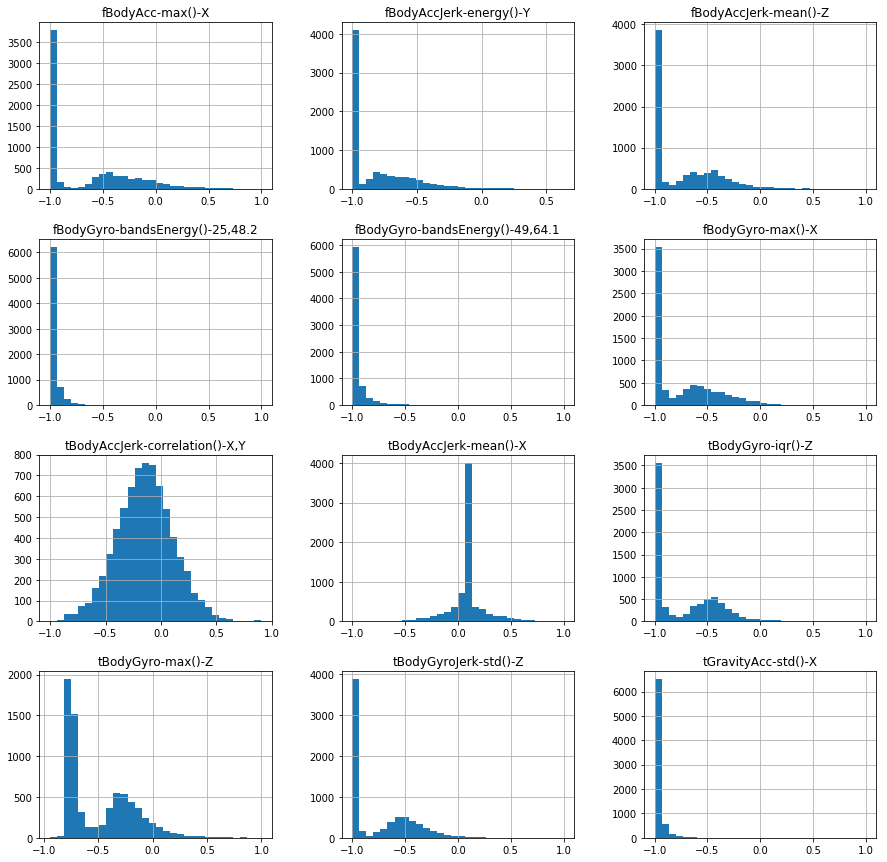

In [ ]:
from random import randint

feature_size = X_train.shape[1] # There are 561 features
rand_list = list(randint(0,feature_size) for i in range(12)) # make a list of features to randomly sample.

X_train.iloc[:,rand_list].hist(bins=30, figsize=(15,15))

plt.show()

# Classification

- Reading test files


- Types of classification algorithms in Machine Learning
    1. Linear Classifiers: Logistic Regression, Naive Bayes Classifier.
    2. Nearest Neighbor.
    3. Support Vector Machines.
    4. Decision Trees.
    5. Boosted Trees.
    6. Random Forest.
    7. Perceptron
    8. Neural Networks.


In [ ]:
print('reading the data')
# Reading Training file
X_test = pd.read_csv('UCI HAR Dataset/test/X_test.txt', delim_whitespace=True, header=None)
y_test = pd.read_csv('UCI HAR Dataset/test/y_test.txt', delim_whitespace=True, header=None)
y_test2= pd.read_csv('UCI HAR Dataset/test/y_test.txt', delim_whitespace=True, header=None)
print('finished reading data')

reading the data
finished reading data


# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logreg = LogisticRegression()
logreg.fit(X_train, y_train)


y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))


from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Accuracy of logistic regression classifier on test set: 0.96
              precision    recall  f1-score   support

           1       0.94      1.00      0.97       496
           2       0.97      0.95      0.96       471
           3       1.00      0.97      0.98       420
           4       0.97      0.88      0.92       491
           5       0.90      0.97      0.94       532
           6       1.00      1.00      1.00       537

    accuracy                           0.96      2947
   macro avg       0.96      0.96      0.96      2947
weighted avg       0.96      0.96      0.96      2947




# Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB 

# Create Naive Bayes classifier 
classifier = GaussianNB()

# Train the classifier
classifier.fit(X_train, y_train)



# Predict the values for training data
y_pred = classifier.predict(X_test)

#Compute accuracy
accuracy = 100.0 * (y_test == pd.DataFrame(y_pred)).sum() / X_test.shape[0]

print("Accuracy of Naive Bayes classifier =", round(list(accuracy)[0], 2), "%")

Accuracy of Naive Bayes classifier = 77.03 %


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# K-Nearest-Neighbour

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

xx=np.array(X_train)
yy=np.array(y_train)

neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(xx, yy) 
KNeighborsClassifier(...)


result=neigh.predict(np.array(X_test))

from sklearn.metrics import accuracy_score
z=accuracy_score(y_test,result)
z

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys


0.8907363420427553

# SVM

In [ ]:
from sklearn import svm
classifier = svm.SVC()
classifier.fit(X_train, y_train)

results = classifier.predict(X_test)

from sklearn.metrics import accuracy_score
z=accuracy_score(y_test,results)
z

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.9402782490668476

# Cart

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=1)
poly_x=poly.fit_transform(X_train)

regressor=LinearRegression()
regressor.fit(poly_x,y_train)
z=regressor.predict(poly.fit_transform(X_test))

import pandas as pd
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split
from sklearn import metrics


clf = DecisionTreeClassifier() 
clf = clf.fit(X_train,y_train)  
y_pred = clf.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8629114353579912


# Decision Tree

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


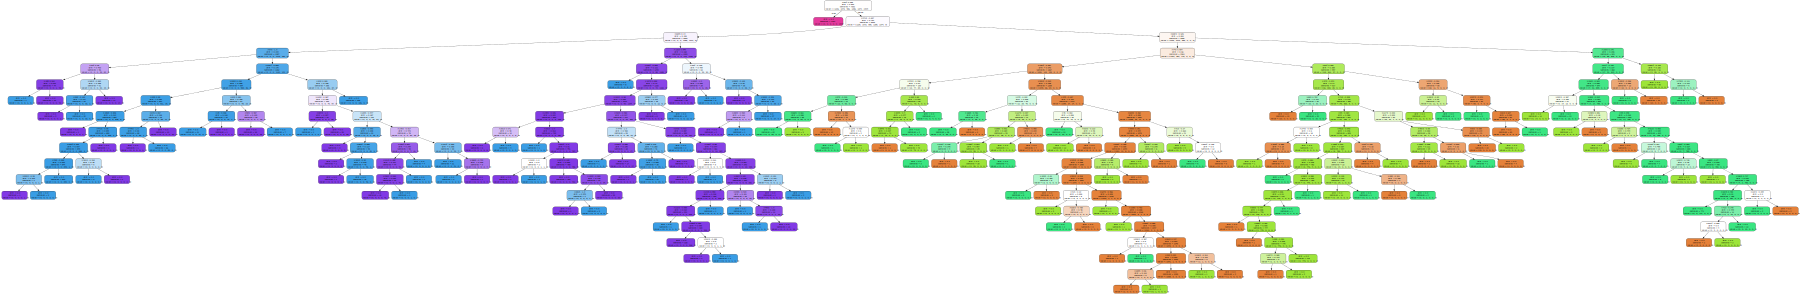

In [ ]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.set_size('"25,15!"')
graph.write_png('tree.png')
Image(graph.create_png())

import graphviz
gvz_graph = graphviz.Source(graph.to_string())
gvz_graph

# Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# Instantiate gradient boosting
grbst = GradientBoostingRegressor(max_depth=15, 
            n_estimators=50,
            random_state=2)
# Fit gb to the training set
grbst.fit(X_train,y_train)

# Predict test set labels
y_pred = grbst.predict(X_test)


from sklearn.metrics import mean_squared_error 
z=mean_squared_error(y_test,y_pred)
print("MSE Error is ", z)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MSE Error is  0.16115851428775316


# Random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import time

clf = RandomForestClassifier(n_estimators=20)
start = time.time()
clf = clf.fit(X_train, y_train)
print('Random forest took %.2f seconds' % ((time.time() - start)))
y_predict = clf.predict(X_test)

print(classification_report(y_test, y_predict))



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


Random forest took 2.23 seconds
              precision    recall  f1-score   support

           1       0.88      0.97      0.92       496
           2       0.89      0.88      0.88       471
           3       0.96      0.85      0.90       420
           4       0.90      0.89      0.89       491
           5       0.90      0.90      0.90       532
           6       1.00      1.00      1.00       537

    accuracy                           0.92      2947
   macro avg       0.92      0.92      0.92      2947
weighted avg       0.92      0.92      0.92      2947



# K-Fold Cross Validation

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict
print('------------------- Cross Validation ---------------')
# cross_val_predict returns an array of the same size as target where each entry
# is a prediction obtained by cross validated:
X_train_np = X_train.as_matrix()
y_train_np = y_train.as_matrix()
y_train_np = y_train_np.flatten() # This converts y from dim (n,1) to (n,) i.e. 2D to 1D.

assert X_train_np.shape == X_train.shape
#assert y_train_np.shape == y_train[:].shape # this will fail.


print(X_train_np.shape, y_train_np.shape, y_train[:].shape)

clf = RandomForestClassifier(n_estimators=20)

predicted = cross_val_predict(clf, X_train_np, y_train_np, cv=10)

y_test_np = y_test.as_matrix().flatten()
y_train_np.shape == y_test_np.shape
predicted.shape

import sklearn
scores = sklearn.model_selection.cross_val_score(
        clf, X_train_np, y_train_np, cv=10)

print('Accuracy: %0.2f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

------------------- Cross Validation ---------------
(7352, 561) (7352,) (7352, 1)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


Accuracy: 0.92 (+/- 0.09)


In [ ]:
import sklearn
scores = sklearn.model_selection.cross_val_score(
        clf, X_train_np, y_train_np, cv=10)

print('Accuracy: %0.2f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

Accuracy: 0.92 (+/- 0.08)


## Expected vs Predicted Plot

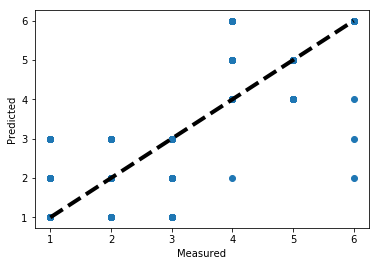

In [ ]:
fig,ax = plt.subplots()
ax.scatter(y_train_np, predicted)
ax.plot([y_train_np.min(), y_train_np.max()], [y_train_np.min(), y_train_np.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

# Perceptron 

In [ ]:
from sklearn.linear_model import Perceptron
pn = Perceptron(tol=1e-3, random_state=0)
pn.fit(X_train, y_train)

pn.score(X_train,y_train)
pn.score(X_test,y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9484221241940957

# Neural Network

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical


model = Sequential()
model.add(Dense(561, input_dim=561, activation='relu'))
model.add(Dense(9, activation='relu'))
model.add(Dense(7, activation='softmax'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


y_test_cat=to_categorical(y_test)
y_train_cat=to_categorical(y_train)
model.fit(X_train, y_train_cat, epochs=20, batch_size=10)


_, accuracy = model.evaluate(X_test, y_test_cat)
print('Accuracy: %.2f' % (accuracy*100))

Using TensorFlow backend.







Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/20





7352/7352 [==============================] - 4s 612us/step - loss: 0.2449 - acc: 0.8927
Epoch 2/20
7352/7352 [==============================] - 4s 523us/step - loss: 0.1339 - acc: 0.9273
Epoch 3/20
7352/7352 [==============================] - 4s 540us/step - loss: 0.1032 - acc: 0.9530
Epoch 4/20
7352/7352 [==============================] - 4s 539us/step - loss: 0.0893 - acc: 0.9691
Epoch 5/20
7352/7352 [==============================] - 4s 542us/step - loss: 0.0765 - acc: 0.9732
Epoch 6/20
7352/7352 [==============================] - 4s 546us/step - loss: 0.0535 - acc: 0.9816
Epoch 7/20
7352/7352 [==============================] - 4s 542us/step - loss: 0.0418 - acc: 0.9850
Epoch 8/20
7352/7352 [==============================] - 4s 521us/step - loss: 0.0346 - acc: 0.9867
Epoch 9/20
7352/7352 [==============================] - 4s 518us/step - loss: 0.0283 - acc: 0.9887
Ep

- When labels were reduced to 2 only activity and no activity our neural network was able to get accuracy of nearly 99.9%
- This shows that classification of only 2 labels despite of very noisy data yields a very good accuracy.

In [ ]:
for i in range(len(X_test)):
    
    check=y_test[0].iloc[i]
    if (check==1) or (check==2) or (check==3):
        y_test2[0].iloc[i]=1
        
    else:
        y_test2[0].iloc[i]=0

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical


model = Sequential()
model.add(Dense(561, input_dim=561, activation='relu'))
model.add(Dense(9, activation='relu'))
model.add(Dense(2, activation='softmax'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


y_test_cat=to_categorical(y_test2)
y_train_cat=to_categorical(y_train2)
model.fit(X_train, y_train_cat, epochs=20, batch_size=10)


_, accuracy = model.evaluate(X_test, y_test_cat)
print('Accuracy: %.2f' % (accuracy*100))

Epoch 1/20
7352/7352 [==============================] - 4s 535us/step - loss: 0.0100 - acc: 0.9971
Epoch 2/20
7352/7352 [==============================] - 4s 510us/step - loss: 0.0073 - acc: 0.9985
Epoch 3/20
7352/7352 [==============================] - 4s 505us/step - loss: 3.2097e-04 - acc: 1.0000
Epoch 4/20
7352/7352 [==============================] - 4s 511us/step - loss: 8.8070e-06 - acc: 1.0000
Epoch 5/20
7352/7352 [==============================] - 4s 496us/step - loss: 4.1247e-06 - acc: 1.0000
Epoch 6/20
7352/7352 [==============================] - 4s 500us/step - loss: 0.0066 - acc: 0.9985
Epoch 7/20
7352/7352 [==============================] - 4s 489us/step - loss: 0.0048 - acc: 0.9992
Epoch 8/20
7352/7352 [==============================] - 4s 511us/step - loss: 4.8122e-06 - acc: 1.0000
Epoch 9/20
7352/7352 [==============================] - 4s 493us/step - loss: 7.3854e-07 - acc: 1.0000
Epoch 10/20
7352/7352 [==============================] - 4s 496us/step - loss: 7.1448e-07